<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe11-BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del camino más corto 

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$, o una declaración indicando que $G$ contiene un ciclo negativo.


# 2. Algoritmo de Bellman-Ford

## 2.1 Código

### Funciones auxiliares

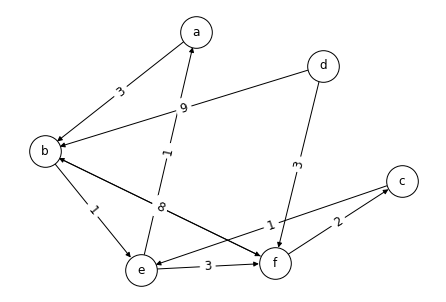

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
import string
import random

def graph_instance_creator(n):
  graph = nx.gnp_random_graph(n, 0.25, 1, True)

  mapping = dict(zip(graph, string.ascii_lowercase))
  graph = nx.relabel_nodes(graph, mapping)

  weighted_edges = list()

  for e in graph.edges():
    weight = random.randint(1, 9)
    weighted_edges.append((e[0], e[1], weight))

  return create_graph(weighted_edges)

def create_graph(edges):
  graph = nx.DiGraph()
  graph.add_weighted_edges_from(edges)
  
  distances = dict()
  predecessors = dict()

  for n in graph.nodes():
    distances[n] = None
    predecessors[n] = None

  nx.set_node_attributes(graph, distances, 'distance')
  nx.set_node_attributes(graph, predecessors, 'predecessor')

  return graph

def draw_graph(G):
  weights = nx.get_edge_attributes(G, 'weight')

  pos = nx.spring_layout(G, k=4, seed=1)
  nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000,
          node_color='white', edgecolors='black')
  
  nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=12)

  plt.show()
  plt.close()

G = graph_instance_creator(6)
draw_graph(G)

### Bellman-Ford

{'s': 0, 't': 2, 'y': 7, 'x': 4, 'z': -2}


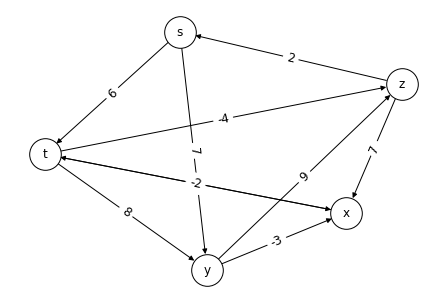

In [53]:
from termcolor import colored
from math import inf

def bellman_ford(G, s):
  for n in G.nodes():
    # Inicializamos la distancia de 's' a cada nodo 'v' como infinito
    G.nodes[n]['distance'] = inf

  # Inicializamos el nodo de partida con distancia cero
  G.nodes[s]['distance'] = 0

  # Se recorren los arcos del grafo n-1 veces
  for i in range(len(G.nodes())):
    for e in G.edges():
      u, v = e[0], e[1]

      distance_u = G.nodes[u]['distance'] # Mínima distancia de 's' hasta 'u'
      distance_v = G.nodes[v]['distance'] # Miníma distancia de 's' hasta 'v'
      weight = G[u][v]['weight'] # Distancia de 'u' hasta 'v'

      # Se calcula la nueva distancia a 'v' y si es menor se actualiza
      if (distance_u + weight) < distance_v:
        G.nodes[v]['distance'] = distance_u + weight
        G.nodes[v]['predecessor'] = u

  # Se vuelven a recorrer los arcos para revisar si existen ciclos negativos
  for e in G.edges():
    u, v = e[0], e[1]

    distance_u = G.nodes[u]['distance'] # Mínima distancia de 's' hasta 'u'
    distance_v = G.nodes[v]['distance'] # Miníma distancia de 's' hasta 'v'
    weight = G[u][v]['weight'] # Distancia de 'u' hasta 'v'

    if (distance_u + weight) < distance_v:
      return False # Retornamos False para indicar que existe un ciclo negativo

  return get_distances(G, s)

def get_distances(G, s):
  distances = dict()

  for n in G.nodes():
    distances[n] = G.nodes[n]['distance']

  return distances

edges = [
  ('s', 't', 6),
  ('s', 'y', 7),
  ('t', 'x', 5),
  ('t', 'y', 8),
  ('t', 'z', -4),
  ('x', 't', -2),
  ('y', 'x', -3),
  ('y', 'z', 9),
  ('z', 's', 2),
  ('z', 'x', 7)
]

G = create_graph(edges)
distances = bellman_ford(G, 's')
print(distances)
draw_graph(G)

## 2.2. Descripción del algoritmo


## 2.3 Ejemplo


## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso del algoritmo:

# 3. Correctitud

### **Teorema 1: Correctitud del algoritmo Bellman-Ford**

*Correctitud*

## Prueba del Teorema

### Hipótesis inductiva

*Hipótesis*

### Prueba por inducción

**Caso base**

**Paso inductivo**

# 4. Tiempo de ejecución

### **Teorema 2: Tiempo de ejecución del algoritmo Bellman-Ford**

*Teorema*



# 5. Experimentos

## 5.1 Experimento 1

### Análisis de resultados

## 5.2 Experimento 2

### Análisis de resultados